# Classification: CATS vs DOGS 
    jpeg -> CNN Keras -> [0,1]
---

Import Tensorflow with Keras and Packages

In [1]:
import tensorflow as tf

In [32]:
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
from keras import backend as K

In [4]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from PIL import Image

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline 

In [6]:
import os

---
### FOLDERS and CATEGORIES:

- Folders

In [7]:
datadir = 'dogVScat'
cat1 = 'dogs'
cat2 = 'cats'

- Training set

In [8]:
target = os.chdir(datadir + "/train/" + cat1)
cat_1 = os.listdir()

In [9]:
target = os.chdir("../" + cat2)
cat_2 = os.listdir()

In [10]:
print("CAT1:",len(cat_1),"CAT2:",len(cat_2), "TOTAL:",len(cat_1)+len(cat_2))

CAT1: 5501 CAT2: 6054 TOTAL: 11555


- Validation set

In [11]:
target = os.chdir("../../validation/" + cat1)
cat_1_val = os.listdir()

In [12]:
target = os.chdir("../" + cat2)
cat_2_val = os.listdir()

In [13]:
print("CAT1:",len(cat_1_val),"CAT2:",len(cat_2_val), "TOTAL:",len(cat_1_val)+len(cat_2_val))

CAT1: 1302 CAT2: 1500 TOTAL: 2802


- Return to Home

In [14]:
os.chdir("../../../")

---
### HYPER PARAMETERS:

- Dimensions
- Epochs
- Batch

In [31]:
###
img_width, img_height = 300, 300

data_dir = 'dogVScat'
train_data_dir = data_dir + '/train'
validation_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

nb_train_samples = len(cat_1)+len(cat_2)
nb_validation_samples = len(cat_1_val)+len(cat_2_val)
epochs = 5                                                 # 50
batch_size = 32                                            # 16

---
### CNN MODEL:

- Layers Architecture

In [16]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [17]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

- Data Generators

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [25]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

- Train VS Validation SET

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 11555 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2802 images belonging to 2 classes.


- Visualize on Tensorboard 

In [33]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

- Model Training 

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=[tensorboard])

Epoch 1/5
361/361 [==============================] - 553s 2s/step - loss: 0.5096 - acc: 0.7584 - val_loss: 0.5269 - val_acc: 0.7845
Epoch 2/5
361/361 [==============================] - 564s 2s/step - loss: 0.5045 - acc: 0.7630 - val_loss: 0.4669 - val_acc: 0.7888
Epoch 3/5
361/361 [==============================] - 585s 2s/step - loss: 0.4921 - acc: 0.7645 - val_loss: 0.4461 - val_acc: 0.8036
Epoch 4/5
361/361 [==============================] - 544s 2s/step - loss: 0.4856 - acc: 0.7759 - val_loss: 0.4608 - val_acc: 0.7957
Epoch 5/5
361/361 [==============================] - 559s 2s/step - loss: 0.4821 - acc: 0.7832 - val_loss: 0.5391 - val_acc: 0.7996


- Visualize Learning Rate

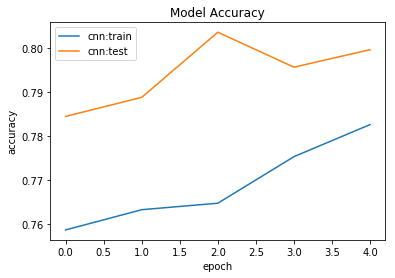

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test'], loc='upper left')
plt.show()

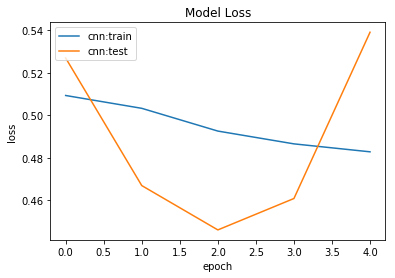

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test'], loc='upper left')
plt.show()

- Save

In [37]:
model.save_weights('keras_weights.h5')
model.save('keras_model.h5') 